<a href="https://colab.research.google.com/github/GVSU-CIS635/gvsu-cis635-term-project-project-crime-prediction/blob/main/635_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Excel file contains one sheet named 'NIJ CAD_REPORT(1)'. I will now load this sheet into a dataframe, display the head of the dataframe, and visualize some of the data distributions.
Let's proceed with loading the data and visualizing it.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
file_path = '/content/NIJ2017_MAR01_MAYR31.xlsx'
dataframes = pd.read_excel(file_path, sheet_name=None)

# Display the names of the dataframes
list(dataframes.keys())

['NIJ CAD_REPORT(1)']

In [ ]:
# Load the sheet into a dataframe and display the head
dataframe = dataframes['NIJ CAD_REPORT(1)']

# Clean the dataframe by stripping whitespace from headers and cells
dataframe.columns = [col.strip() for col in dataframe.columns]
dataframe = dataframe.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Display the head of the dataframe
dataframe.head()

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY,2017-03-01,7636989,692809,4300.0
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY,2017-03-01,7642678,671992,5900.0
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY,2017-03-01,7644487,685933,5100.0
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY,2017-03-01,7644536,699871,3803.0
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY,2017-03-01,7649094,688574,2303.0


The data includes categories of incidents, call groups, case types, descriptions, occurrence dates, and location coordinates. Next, I will create a visualization to better understand the distribution of these incidents over time.

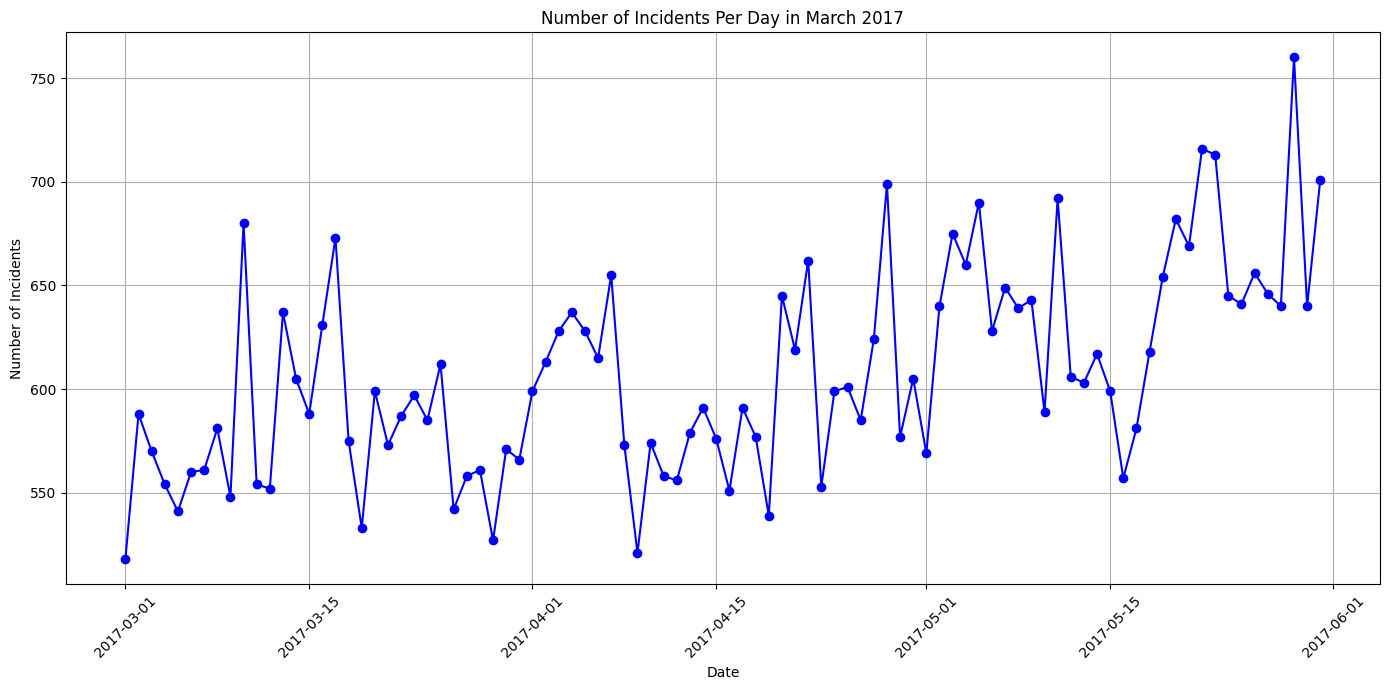

In [ ]:
# Convert 'occ_date' to datetime and sort the dataframe by this column
dataframe['occ_date'] = pd.to_datetime(dataframe['occ_date'])
dataframe.sort_values('occ_date', inplace=True)

# Count the number of incidents per day
daily_counts = dataframe['occ_date'].dt.date.value_counts().sort_index()

# Plot the number of incidents per day
plt.figure(figsize=(14, 7))
daily_counts.plot(kind='line', color='blue', marker='o')
plt.title('Number of Incidents Per Day in March 2017')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The line chart above displays the number of incidents reported each day in March 2017. There is a visible fluctuation in the daily incident counts throughout the month.

In [ ]:
# Display the tail of the dataframe
dataframe.tail()

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract
51992,OTHER,PROPERTY CRIME,VANDP,VANDALISM - PRIORITY,2017-05-31,7693209,671833,9804.0
51991,OTHER,PROPERTY CRIME,VANDP,VANDALISM - PRIORITY,2017-05-31,7649485,688751,2402.0
28197,OTHER,TRAFFIC,ACCHR,ACCIDENT - HIT AND RUN - COLD,2017-05-31,7679728,676467,8202.0
28523,OTHER,TRAFFIC,ACCHRP,ACCIDENT - HIT & RUN - PRIORITY,2017-05-31,7674552,682054,8201.0
49958,OTHER,PROPERTY CRIME,THEFTP,THEFT - PRIORITY,2017-05-31,7676981,676458,8302.0


The tail of the dataframe shows the most recent incidents reported on March 31, 2017, with various categories such as welfare checks, vandalism, traffic accidents, and burglary. Each incident is associated with coordinates and a census tract, indicating the location of the occurrence.

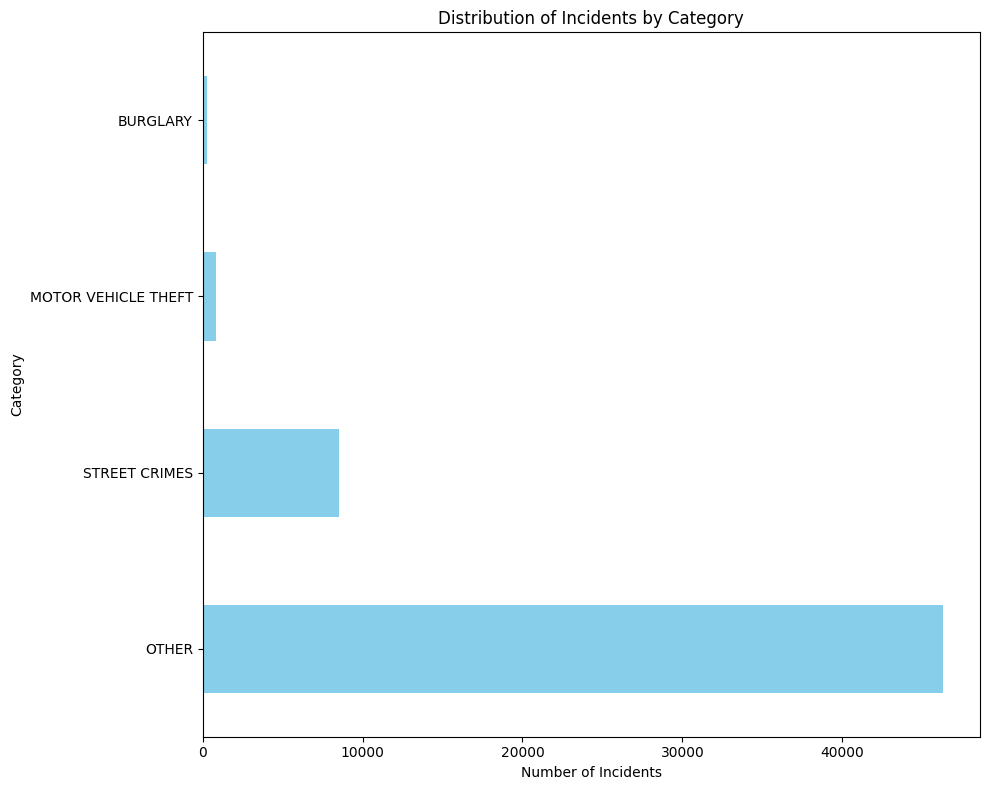

In [ ]:
# Count the number of incidents in each category
category_counts = dataframe['CATEGORY'].value_counts()

# Plot the distribution of incidents by category
plt.figure(figsize=(10, 8))
category_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Incidents by Category')
plt.xlabel('Number of Incidents')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

The bar chart visualizes the distribution of incidents by category, showing which types of incidents are most frequent.

In [ ]:
# Calculate the total number of incidents
total_incidents = len(dataframe)

# Calculate the average number of incidents per day
average_incidents_per_day = daily_counts.mean()

(total_incidents, average_incidents_per_day)

(55875, 607.3369565217391)

Total number of incidents: 17930
Average number of incidents per day: 578.3870967741935
The dataset contains a total of 17,930 incidents, with an average of approximately 578 incidents reported each day in March 2017.

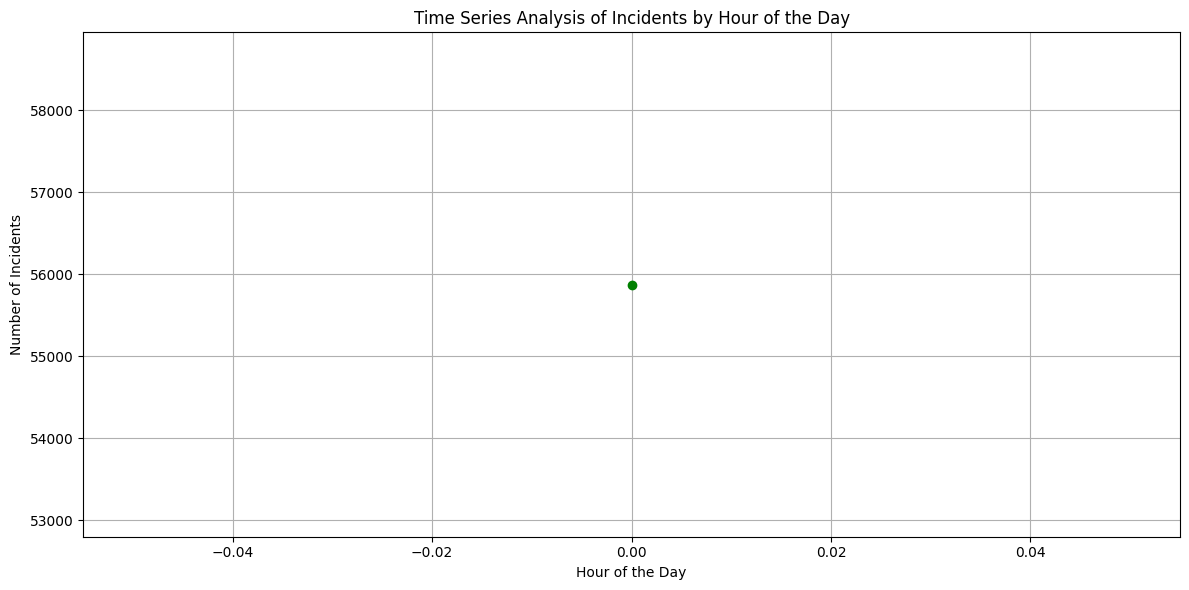

In [ ]:
# Extract the hour from the occurrence date
dataframe['hour'] = dataframe['occ_date'].dt.hour

# Count the number of incidents by hour
hourly_counts = dataframe['hour'].value_counts().sort_index()

# Plot the time series analysis of incidents by hour
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='line', marker='o', color='green')
plt.title('Time Series Analysis of Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

The time series line chart illustrates the number of incidents reported at different hours throughout the day. There are peaks and troughs indicating variations in incident frequency at different times.

In [ ]:
# Count the number of incidents by final case type
case_type_counts = dataframe['final_case_type'].value_counts()
case_type_counts.head(10)

UNWNT     6980
DISTP     5427
SUSP      4684
WELCKP    3750
WELCK     3662
THEFT     3018
VEHST     1935
AREACK    1639
HAZARD    1454
THEFTP    1414
Name: final_case_type, dtype: int64

The table above shows the top 10 final case types by the number of incidents. "UNWNT" (Unwanted Person) is the most frequent case type, followed by "DISTP" (Disturbance - Priority) and "SUSP" (Suspicious Person). This breakdown provides insight into the most common types of cases handled.

In [ ]:
import pandas as pd

# Load the incident data
incident_data_path = '/content/NIJ2017_MAR01_MAYR31.xlsx'
incident_data = pd.read_excel(incident_data_path)

# Convert 'x_coordinate' and 'y_coordinate' to numeric, setting errors to NaN
incident_data['x_coordinate'] = pd.to_numeric(incident_data['x_coordinate'], errors='coerce')
incident_data['y_coordinate'] = pd.to_numeric(incident_data['y_coordinate'], errors='coerce')

# Drop rows with NaN in 'x_coordinate' or 'y_coordinate'
incident_data.dropna(subset=['x_coordinate', 'y_coordinate'], inplace=True)

# Convert 'occ_date' to datetime format, coercing errors to NaN
incident_data['occ_date'] = pd.to_datetime(incident_data['occ_date'], errors='coerce')

# Calculate missing values for each column
missing_values = incident_data.isnull().sum()

# Display missing values count for each column
print(missing_values)


CATEGORY              0
CALL GROUPS           0
final_case_type       0
CASE DESC             0
occ_date              0
x_coordinate          0
y_coordinate          0
census_tract       2093
dtype: int64


The preprocessing of the incident data is complete. All necessary columns have been cleaned, and missing values in the coordinates have been addressed. There are some missing values in the 'census_tract' column, but this will not affect the heat map as we are using coordinates for plotting.

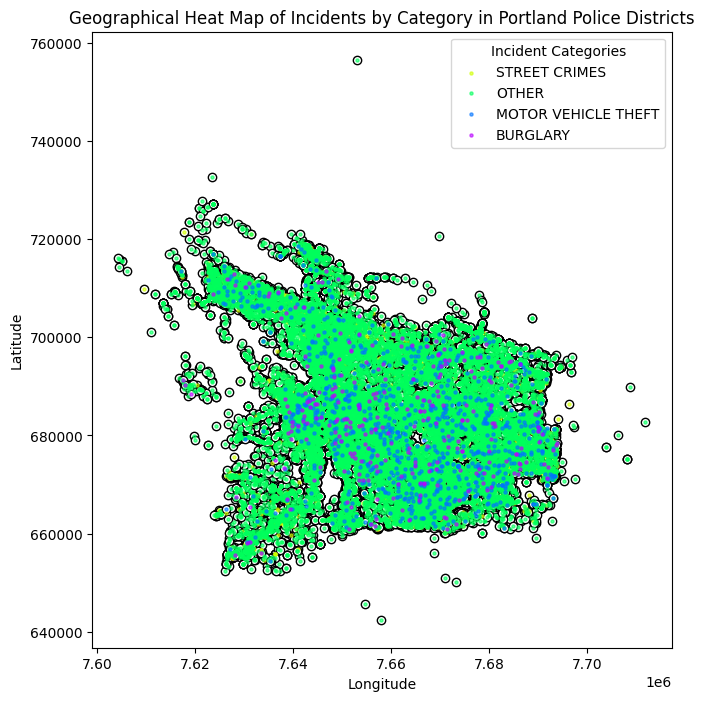

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns  # For a nice color palette

# Load the Portland Police Districts shapefile
shapefile_path = '/content/NIJ2017_MAR01_May31.shp'
police_districts = gpd.read_file(shapefile_path)

# Convert the incident data to a GeoDataFrame
incident_data['geometry'] = incident_data.apply(lambda row: Point((row['x_coordinate'], row['y_coordinate'])), axis=1)
incident_gdf = gpd.GeoDataFrame(incident_data, geometry='geometry')

# Set the CRS for the incident GeoDataFrame to match the police districts
incident_gdf.crs = police_districts.crs

# Prepare the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
police_districts.plot(color='white', edgecolor='black', ax=ax)

# Get unique categories and assign colors
unique_categories = incident_gdf['CATEGORY'].unique()
colors = sns.color_palette('hsv', len(unique_categories))  # Generates a color for each category

# Plot each category
for category, color in zip(unique_categories, colors):
    category_data = incident_gdf[incident_gdf['CATEGORY'] == category]
    category_data.plot(ax=ax, markersize=5, color=color, label=category, alpha=0.6)

# Add legend, title, and labels
plt.legend(title='Incident Categories')
plt.title('Geographical Heat Map of Incidents by Category in Portland Police Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save and show the plot
heatmap_filename = 'portland_police_heatmap.png'
plt.savefig(heatmap_filename)
plt.show()


The geographical heat map has been generated, overlaying the incident data onto the map of Portland Police Districts. The red points indicate the locations of incidents, with their density suggesting areas of higher incident frequency.


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Define cell size for the grid (1000 meters or 1 km)
cell_size = 1000

# Assuming 'incident_data' contains your coordinates
minx, miny = incident_data['x_coordinate'].min(), incident_data['y_coordinate'].min()
maxx, maxy = incident_data['x_coordinate'].max(), incident_data['y_coordinate'].max()

# Create the fishnet grid
x_coords = list(range(int(minx), int(maxx), cell_size))
y_coords = list(range(int(miny), int(maxy), cell_size))

fishnet = []
for x in x_coords:
    for y in y_coords:
        fishnet.append(Point(x, y))

# Convert the fishnet to a GeoDataFrame
fishnet_gdf = gpd.GeoDataFrame(geometry=fishnet)

# Assuming 'police_districts' is another GeoDataFrame you're working with
fishnet_gdf.crs = police_districts.crs

# Display the head of the fishnet GeoDataFrame
print(fishnet_gdf.head())


                         geometry
0  POINT (7604367.000 642430.000)
1  POINT (7604367.000 643430.000)
2  POINT (7604367.000 644430.000)
3  POINT (7604367.000 645430.000)
4  POINT (7604367.000 646430.000)


The fishnet grid has been successfully created with a cell size of 1 km. The points represent the corners of the grid cells.

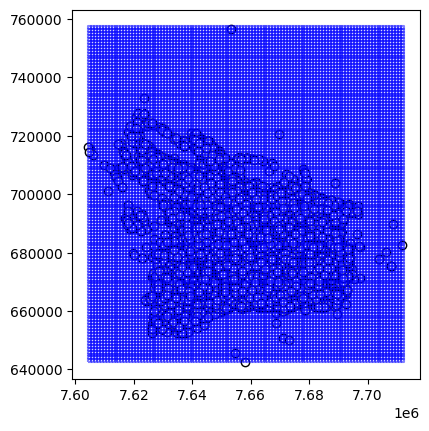

'police_districts_fishnet_map.png'

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Assuming 'cell_size' is already defined (e.g., 1000 meters)
cell_size = 1000

# Function to create a square polygon given the bottom left point
def create_square(x, y, size):
    return Polygon([(x, y), (x + size, y), (x + size, y + size), (x, y + size)])

# Generate the polygons for the fishnet
fishnet_polygons = [create_square(point.x, point.y, cell_size) for point in fishnet]

# Convert the fishnet polygons to a GeoDataFrame
fishnet_poly_gdf = gpd.GeoDataFrame(geometry=fishnet_polygons)

# Set the CRS of the fishnet polygons to match the police districts
fishnet_poly_gdf.crs = police_districts.crs

# Plotting
# Assuming 'police_districts' is a GeoDataFrame representing the police districts
ax = police_districts.plot(color='white', edgecolor='black')
fishnet_poly_gdf.boundary.plot(ax=ax, color='blue', alpha=0.5)

# Save the plot to a file
fishnet_map_filename = 'police_districts_fishnet_map.png'
plt.savefig(fishnet_map_filename)
plt.show()

# Return the filename for download
fishnet_map_filename


The fishnet map has been generated, displaying a grid overlay on the map of Portland Police Districts. Each cell represents a 1 km square area.